# Transfer Learning Basics

In [24]:
%%html
<h3 style="color:#049">Transferring</h3>

In [22]:
%%html
%%latex
<h4 style="color:#089">Whether Feature Space $\mathbb{X}$ and $\mathbb{Y}$ of two Domains are same!</h4>

In [26]:
%%html
%%latex
<h4 style="color:#089">Whether Marginal Distributions $P(X)$ and $P(Y)$ of elements in Feature Space $X \in \mathbb{X}$ and $Y \in \mathbb{Y}$ are same!</h4>


In [32]:
%%latex
$X = \{x_1, x_2, \ldots, x_n\}$ and $Y = \{y_1, y_2, \ldots, y_m\}$.

We consider n=m (say)!

<IPython.core.display.Latex object>

In [35]:
%%latex
For $i^{th}$ element, name($x_i$) = name($y_i$) = 'bacteria_name' we will check the marginal distributions $P(x_i)$ and $P(y_i)$.

<IPython.core.display.Latex object>

In [100]:
%%html
<h5 style="color:#109">Overall Bacterial Distribution</h5>

In [103]:
%%html
<h7 style="color:#909">Mimic Bacterial Distribution</h7>

In [44]:
import pandas as pd
mimic=pd.read_csv('zevac_data.csv', sep='\t', usecols = ['patient_id', 'admission_id', 'age', 'sex', 'sc_date',
       'sample_type', 'bacteria_name', 'antibiotic_name', 'num_prev_adm',
       'interval', 'device', 'hai', 'susceptibility', 'comorbidity'])

In [52]:
bacteria = mimic.bacteria_name.unique()

In [58]:
mimicIsolateCounts = pd.DataFrame(columns=['bacteria_name', 'isolates', 'percentage'])

In [55]:
def count(bacteria):
    filtered = mimic[mimic.bacteria_name==bacteria][['patient_id', 'admission_id', 'sc_date']].drop_duplicates().shape[0]
    return filtered

In [60]:
mimicIsolateCounts.bacteria_name = pd.Series(bacteria)
mimicIsolateCounts.isolates = mimicIsolateCounts.bacteria_name.apply(lambda x: count(x))
mimicIsolateCounts.percentage = mimicIsolateCounts.isolates.apply(lambda x: 100*(x/sum(mimicIsolateCounts.isolates)))

In [64]:
mimicIsolateCounts = mimicIsolateCounts.sort_values(by=['percentage'], ascending=False)
mimicIsolateCounts

,bacteria_name,isolates,percentage
0,Staphylococcus aureus,7469,27.037104
8,Escherichia coli,3562,12.894118
6,Enterococcus,3485,12.615385
5,Pseudomonas aeruginosa,2877,10.414480
1,Staphylococcus,2368,8.571946
2,Klebsiella pneumoniae,2030,7.348416
9,Enterobacter cloacae,816,2.953846
13,Proteus mirabilis,654,2.367421
3,Stenotrophomonas maltophilia,513,1.857014
23,Serratia marcescens,504,1.824434


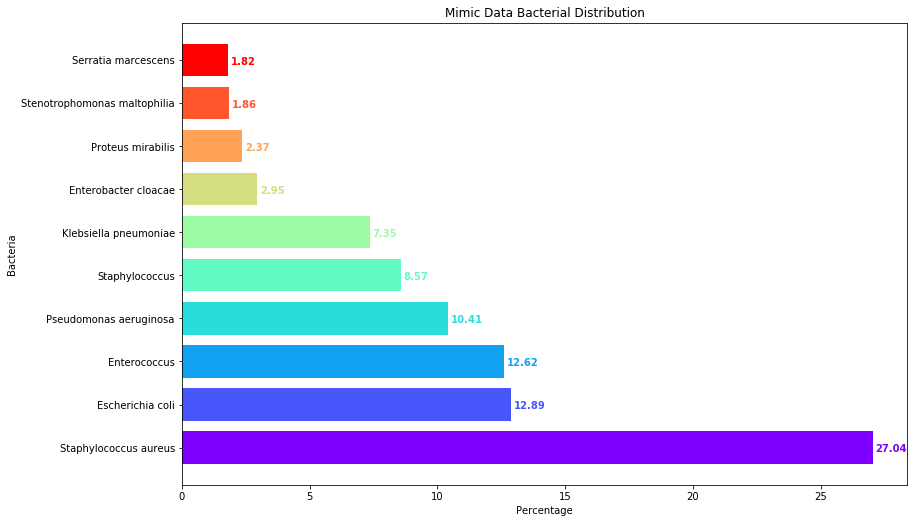

In [99]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
x = mimicIsolateCounts[0:10].bacteria_name
y = mimicIsolateCounts[0:10].percentage
colors = cm.rainbow(np.linspace(0, 1, len(y)))
fig, ax = plt.subplots()
fig.set_size_inches(13, 8.5)
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=colors)
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v+.1, i-.1, str(round(v,2)), color=colors[i], fontweight='bold')
plt.title('Mimic Data Bacterial Distribution')
plt.xlabel('Percentage')
plt.ylabel('Bacteria')      
plt.show()

In [102]:
%%html
<h7 style="color:#909">AIIMS Bacterial Distribution</h7>

In [104]:
aiims=pd.read_csv('/Users/deba_mycol/Zevac_Unified/zevac_unified/pp.csv', usecols=['slno', 'hosp_admission_id', 'hosp_patient_id', 
       'age','sex', 'department', 'sample_type', 'ward_name', 'caretype',
       'num_prev_adm', 'sc_date', 'interval', 'catheter', 'cancer',
       'cerebrovascular_disease', 'dementia_or_alzheimers', 'diabetes',
       'heart_disease', 'hiv_or_aids', 'hypertension', 'liver_disease',
       'pulmonary_disease_asthma', 'renal_disease',
       'rheumatic_or_connective_tissue_disease', 'no_comorbidity',
       'bacteria_name', 'antibiotic_name', 'gram', 'susceptibility'])

bacteria1 = aiims.bacteria_name.unique()
aiimsIsolateCounts = pd.DataFrame(columns=['bacteria_name', 'isolates', 'percentage'])
def count1(bacteria):
    filtered = aiims[aiims.bacteria_name==bacteria][['slno', 'hosp_admission_id', 'hosp_patient_id', 'sc_date']].drop_duplicates().shape[0]
    return filtered
aiimsIsolateCounts.bacteria_name = pd.Series(bacteria1)
aiimsIsolateCounts.isolates = aiimsIsolateCounts.bacteria_name.apply(lambda x: count1(x))
aiimsIsolateCounts.percentage = aiimsIsolateCounts.isolates.apply(lambda x: 100*(x/sum(aiimsIsolateCounts.isolates)))
aiimsIsolateCounts = aiimsIsolateCounts.sort_values(by=['percentage'], ascending=False)
aiimsIsolateCounts


,bacteria_name,isolates,percentage
1,Escherichia coli,8904,27.802411
0,Klebsiella pneumoniae,4951,15.459314
5,Acinetobacter,4100,12.802098
6,Pseudomonas aeruginosa,3087,9.639043
8,Staphylococcus aureus,2210,6.900643
4,Pseudomonas,2080,6.494723
9,"Staphylococcus, coagulase negative",1303,4.068569
10,Enterobacter,1058,3.303566
3,Enterococcus faecium,690,2.154499
11,Klebsiella oxytoca,497,1.551864


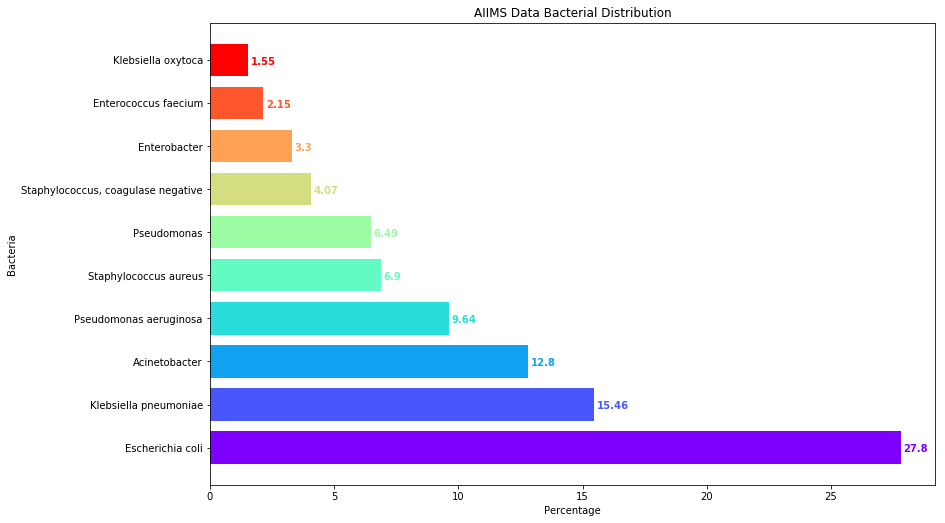

In [105]:
x = aiimsIsolateCounts[0:10].bacteria_name
y = aiimsIsolateCounts[0:10].percentage
colors = cm.rainbow(np.linspace(0, 1, len(y)))
fig, ax = plt.subplots()
fig.set_size_inches(13, 8.5)
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=colors)
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v+.1, i-.1, str(round(v,2)), color=colors[i], fontweight='bold')
plt.title('AIIMS Data Bacterial Distribution')
plt.xlabel('Percentage')
plt.ylabel('Bacteria')      
plt.show()